In [8]:
from standard_imports import *
import os 
from graph_convergence_gaa_1 import *
np.set_printoptions(precision = 15, linewidth=700, suppress=False)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [162]:
ML = 4
d_vec = np.array([1,1,0])

a = 2
b = 0


  0%|          | 0/10 [00:00<?, ?it/s]

2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0


 10%|█         | 1/10 [00:05<00:47,  5.28s/it]

2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0


 20%|██        | 2/10 [00:09<00:38,  4.79s/it]

2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0


 30%|███       | 3/10 [00:14<00:32,  4.69s/it]

2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0


 40%|████      | 4/10 [00:19<00:28,  4.76s/it]

2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0


 50%|█████     | 5/10 [00:24<00:25,  5.07s/it]

2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0


 60%|██████    | 6/10 [00:29<00:20,  5.03s/it]

2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0


 70%|███████   | 7/10 [00:35<00:16,  5.35s/it]

2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0


 80%|████████  | 8/10 [00:40<00:10,  5.27s/it]

2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0


 90%|█████████ | 9/10 [00:46<00:05,  5.24s/it]

2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0


100%|██████████| 10/10 [00:51<00:00,  5.18s/it]


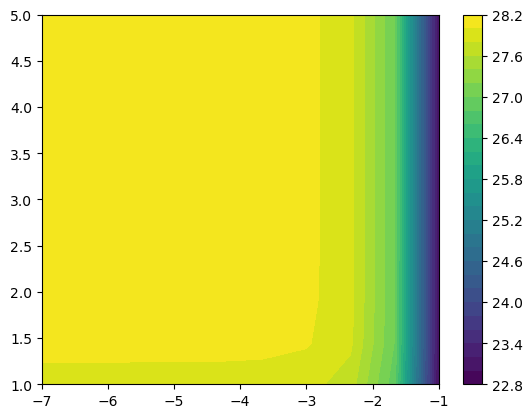

In [14]:
zeros = np.load(file_location(d_vec, ML))['zeros']
d_vec = np.array([1,0,0])
x = zeros[0]


resolution = 10
alpha = np.logspace(-1,-7,resolution)
cutoff = np.logspace(1,5, resolution)

A, C = np.meshgrid(alpha, cutoff, indexing='ij')
Z = np.zeros_like(A)
for i in tqdm(range(len(A))):
    for j in range(len(C)):
        Z[i,j] = limiting(a,b, d_vec, x, A[i,j],C[i,j],ML)
        #derivative(1, d_vec, x, A[i,j],C[i,j],ML) #limiting(a,b,d_vec, x, A[i,j], C[i,j], ML)



#extent = (np.log10(np.min(A)), np.log10(np.max(A)), np.log10(np.min(C)), np.log10(np.max(C)))

#plt.imshow(np.log10(102.83955351102952-Z), extent=extent, origin='lower', aspect='auto')

plt.contourf(np.log10(A), np.log10(C), Z, levels=30)
plt.colorbar()

plt.plot()
plt.show()



In [27]:

g_ab_large(2,0, d_vec, x, 1e6, 0, ML)

28.105936544624917

In [62]:
def deriv_tolarence(d_vec, ML, iterations):
    
    x = np.load(file_location(d_vec, ML))['zeros'][0]
    alpha = 0.01
    cutoff = 1e4
    value = derivative(1, d_vec, x, alpha, cutoff, ML )
    returned_value = value
    increasing_cut = True
    tolerence = 1e-4
    # results = np.array([])
    # cutoffs = np.array([])
    # alphas = np.array([])
    for i in range(iterations):
        if increasing_cut:
            cutoff = cutoff*1.5
            print('new ',cutoff)
            value_tmp = derivative(1, d_vec, x, alpha, cutoff, ML )
            if np.abs(value_tmp-value) < tolerence:
                increasing_cut = False
                # results = np.append(results, value_tmp)
                # cutoffs = np.append(cutoffs, cutoff)
                # alphas = np.append(alphas, alpha)
                returned_value = value_tmp
            value = value_tmp
        else:
            alpha = alpha/1.5
            print('new ',alpha)
            value_tmp = derivative(1, d_vec, x, alpha, cutoff, ML )
            if np.abs(value_tmp-value) > tolerence:
                increasing_cut = True

    return returned_value, cutoff, alpha #results, cutoffs, alphas

In [257]:
ML = 4
d_vec = np.array([1,0,0])

zeros = np.load(file_location(d_vec, ML))['zeros']
x = zeros[0]

print(x)

a = 1
b = 0

resolution = 8
alpha = np.logspace(-2,-4,resolution)
cutoff = np.logspace(2,5.7, resolution)

A, C = np.meshgrid(alpha, cutoff, indexing='xy')
Z = np.zeros_like(A)
for i in tqdm(range(len(A))):
    for j in range(len(C)):
        Z[i,j] = limiting(a,b, d_vec, x, A[i,j],C[i,j],ML)

0.6439411865305936


  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [03:00<00:00, 22.55s/it]


/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_1150/548847680.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(np.log10(A), np.log10(C), np.log10(np.abs(Z-51.12292830023085)), levels=30)


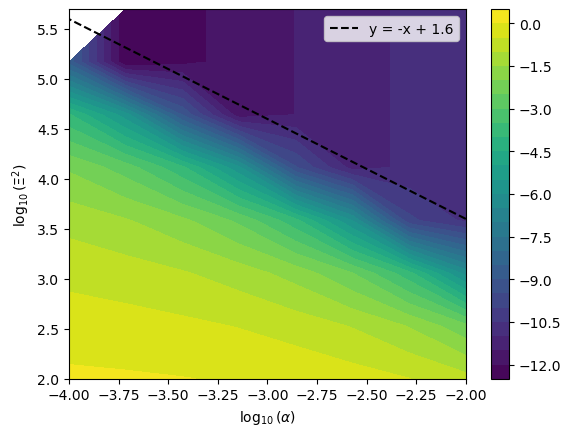

In [269]:

plt.contourf(np.log10(A), np.log10(C), np.log10(np.abs(Z-51.12292830023085)), levels=30)

plt.plot(np.log10(alpha), -np.log10(alpha) +1.6,'--', color = 'black',  label ='y = -x + 1.6')
plt.colorbar()

plt.ylim(min(np.log10(cutoff)),max(np.log10(cutoff)))
plt.legend()
plt.xlabel('$\log_{{10}}(\\alpha)$')
plt.ylabel('$\log_{{10}}(\Xi^2)$')
plt.plot()
plt.show()

In [195]:
limiting(a,b, d_vec, x, 1e-10, 5e4,ML)

100.2652826856679

In [273]:
derivative(1, d_vec, x, 1e-4, 5e5,ML)

(array([13.989602486300406]),
 array([[ 0.               ,  0.               ],
        [51.1229283002286  , 10.337769862790026]]))

In [298]:
d_vec = np.array([1,0,0])
zeros = np.load(file_location(d_vec, ML))['zeros']
x = np.round(zeros[1],7)

In [301]:
derivative(2, d_vec, x, 1e-4, 5e5,ML)

(array([27.79663862775118, 24.16129853142814]),
 array([[  0.               ,   0.               ,   0.               ],
        [101.95405859790091 ,  75.91392857428798 ,   0.               ],
        [ 55.005813857628304, 159.57029198963775 , 363.1570607203235  ]]))

In [ ]:
27.796638626681

In [259]:
print(Z)


[[50.972317722188045 50.80012347551387  50.598061940739115 50.40099554926572  50.22877315558281  50.08800216331651  49.97767261892048  49.89351570939271 ]
 [51.11870394935363  51.093777673191966 51.03029911300737  50.933378195688036 50.823234277608115 50.71782401769589  50.62674481962868  50.55282070870844 ]
 [51.12292767487211  51.12278357665943  51.1197437770317   51.103704151906584 51.066305612657445 51.012057956955864 50.9522144952696   50.89593688843617 ]
 [51.12292830020665  51.12292830009771  51.122927369359424 51.12278863857325  51.12051627923459  51.110198939167574 51.08817313152     51.05781042011919 ]
 [51.122928300206645 51.122928300218405 51.12292830022451  51.122928299875745 51.122927001359145 51.12279885313611  51.12114306018897  51.11460804642886 ]
 [51.122928300206645 51.122928300218405 51.12292830022451  51.12292830022765  51.12292830022926  51.122928299324435 51.12292661650155  51.1228131932226  ]
 [51.122928300206645 51.122928300218405 51.12292830022451  51.12292830

In [241]:
print(A)

[[1.0000000000000000e-02 3.7275937203149418e-03 1.3894954943731374e-03 5.1794746792312130e-04 1.9306977288832496e-04 7.1968567300115290e-05 2.6826957952797274e-05 1.0000000000000001e-05]
 [1.0000000000000000e-02 3.7275937203149418e-03 1.3894954943731374e-03 5.1794746792312130e-04 1.9306977288832496e-04 7.1968567300115290e-05 2.6826957952797274e-05 1.0000000000000001e-05]
 [1.0000000000000000e-02 3.7275937203149418e-03 1.3894954943731374e-03 5.1794746792312130e-04 1.9306977288832496e-04 7.1968567300115290e-05 2.6826957952797274e-05 1.0000000000000001e-05]
 [1.0000000000000000e-02 3.7275937203149418e-03 1.3894954943731374e-03 5.1794746792312130e-04 1.9306977288832496e-04 7.1968567300115290e-05 2.6826957952797274e-05 1.0000000000000001e-05]
 [1.0000000000000000e-02 3.7275937203149418e-03 1.3894954943731374e-03 5.1794746792312130e-04 1.9306977288832496e-04 7.1968567300115290e-05 2.6826957952797274e-05 1.0000000000000001e-05]
 [1.0000000000000000e-02 3.7275937203149418e-03 1.389495494373137

In [242]:
print(C)

[[1.0000000000000000e+02 1.0000000000000000e+02 1.0000000000000000e+02 1.0000000000000000e+02 1.0000000000000000e+02 1.0000000000000000e+02 1.0000000000000000e+02 1.0000000000000000e+02]
 [2.7724079967417731e+02 2.7724079967417731e+02 2.7724079967417731e+02 2.7724079967417731e+02 2.7724079967417731e+02 2.7724079967417731e+02 2.7724079967417731e+02 2.7724079967417731e+02]
 [7.6862461003977376e+02 7.6862461003977376e+02 7.6862461003977376e+02 7.6862461003977376e+02 7.6862461003977376e+02 7.6862461003977376e+02 7.6862461003977376e+02 7.6862461003977376e+02]
 [2.1309410153667955e+03 2.1309410153667955e+03 2.1309410153667955e+03 2.1309410153667955e+03 2.1309410153667955e+03 2.1309410153667955e+03 2.1309410153667955e+03 2.1309410153667955e+03]
 [5.9078379115879434e+03 5.9078379115879434e+03 5.9078379115879434e+03 5.9078379115879434e+03 5.9078379115879434e+03 5.9078379115879434e+03 5.9078379115879434e+03 5.9078379115879434e+03]
 [1.6378937069540612e+04 1.6378937069540612e+04 1.637893706954061

In [92]:
36.15078745794372 - 36.150783400326354

4.0576173674367055e-06

In [60]:
36.1507875785595-36.14681206449014

0.003975514069360031

In [58]:
36.140801520797744 -36.14681206449014

-0.0060105436923976185

In [166]:
17.015216260589114 -   17.01623749142891

-0.0010212308397967718

In [109]:
print(C)

[[ 10000.              10000.              10000.              10000.              10000.              10000.            ]
 [ 21877.616239495517  21877.616239495517  21877.616239495517  21877.616239495517  21877.616239495517  21877.616239495517]
 [ 47863.0092322638    47863.0092322638    47863.0092322638    47863.0092322638    47863.0092322638    47863.0092322638  ]
 [104712.85480508985  104712.85480508985  104712.85480508985  104712.85480508985  104712.85480508985  104712.85480508985 ]
 [229086.76527677747  229086.76527677747  229086.76527677747  229086.76527677747  229086.76527677747  229086.76527677747 ]
 [501187.2336272725   501187.2336272725   501187.2336272725   501187.2336272725   501187.2336272725   501187.2336272725  ]]


In [167]:
print(A)

[[0.01              0.003981071705535 0.001584893192461 0.00063095734448  0.000251188643151 0.0001           ]
 [0.01              0.003981071705535 0.001584893192461 0.00063095734448  0.000251188643151 0.0001           ]
 [0.01              0.003981071705535 0.001584893192461 0.00063095734448  0.000251188643151 0.0001           ]
 [0.01              0.003981071705535 0.001584893192461 0.00063095734448  0.000251188643151 0.0001           ]
 [0.01              0.003981071705535 0.001584893192461 0.00063095734448  0.000251188643151 0.0001           ]
 [0.01              0.003981071705535 0.001584893192461 0.00063095734448  0.000251188643151 0.0001           ]]


# Try to fit line to boundary region


In [127]:
a = 1
b = 1

resolution = 10
alpha = np.logspace(-1,-3,resolution)
cutoff = np.logspace(2,4, resolution)

A, C = np.meshgrid(alpha, cutoff, indexing='xy')
Z = np.zeros_like(A)
for i in tqdm(range(len(A))):
    for j in range(len(C)):
        Z[i,j] = limiting(a,b, d_vec, x, A[i,j],C[i,j],ML)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:23<00:00,  2.37s/it]


/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_78881/1043979193.py:5: RuntimeWarning: invalid value encountered in log
  plt.contourf(np.log10(A), np.log10(C), np.log(Z- Z[-1,:]+1e-6), levels=100)


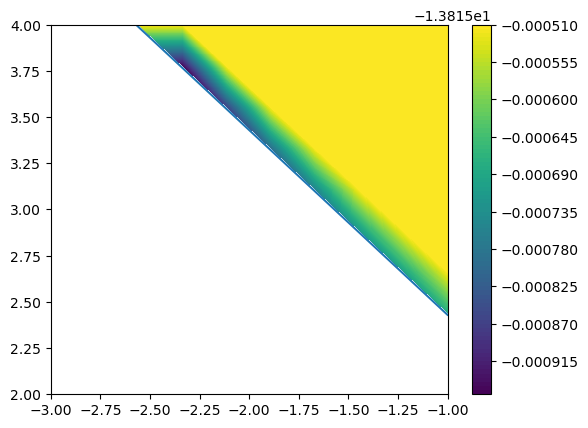

In [159]:
plt.plot(np.log10(alpha), -np.log10(alpha) + 1.43)



plt.contourf(np.log10(A), np.log10(C), np.log(Z- Z[-1,:]+1e-6), levels=100)
plt.colorbar()

plt.ylim(2,4)

plt.show()

In [142]:
print(Z- Z[-1,:])

[[-7.730932123735101e-04 -3.125307498562790e-02 -3.632326203929210e-01 -1.917147492666977e+00 -6.160295164259075e+00 -1.448883993466148e+01 -2.796161948611854e+01 -4.751816506016905e+01 -7.430214170814224e+01 -1.098951200267536e+02]
 [-2.369427399173674e-06 -8.291928592676356e-04 -3.684109282336578e-02 -4.471027311903697e-01 -2.408655603718756e+00 -7.820922905683496e+00 -1.850141564232028e+01 -3.582950019679332e+01 -6.102437433963306e+01 -9.555948563574496e+01]
 [-1.668993832026899e-10 -2.236222311324809e-06 -9.275244295849916e-04 -4.450679993790629e-02 -5.584747005520683e-01 -3.054288586590303e+00 -9.990216037063902e+00 -2.372534862731978e+01 -4.604979316824627e+01 -7.853692451658041e+01]
 [ 3.552713678800501e-15 -1.877680233519641e-10 -2.747139333791893e-06 -1.183335444338240e-03 -5.746041253620859e-02 -7.228667136698022e-01 -3.952937125464814e+00 -1.292154310147735e+01 -3.066969200742531e+01 -5.950009538630907e+01]
 [ 3.552713678800501e-15  0.000000000000000e+00 -2.024762579821981e-

In [139]:
print(Z[-1,:])

[10.607707480852437 10.499484990898772 10.434607312641251 10.395714166328602 10.37239833766882  10.358420865604138 10.350041591242089 10.34501834766644  10.341996273876703 10.335072364090536]


In [161]:
print(10**(1.43)/1e-4)

269153.48039269156


In [202]:
derivative(2, d_vec, x, 1e-4, 1e4, ML)

(array([  742.9735753395449, -1268.874267474484 ]),
 array([[     0.             ,      0.             ,      0.             ],
        [  2673.7269029621293,   1597.6994574842893,      0.             ],
        [ -3129.3892044513323, -17691.307448508003 , -17228.10530012971  ]]))

In [302]:
from derivativeintensive import *

4
4
Next  [0 0 0]


100%|██████████| 15/15 [00:32<00:00,  2.20s/it]


In [212]:
alpha = 1e-4
cutoff = 5e4

In [213]:
derivative_directory(d_vec, ML, 2, alpha, cutoff)

  0%|          | 0/15 [00:00<?, ?it/s]

100%|██████████| 15/15 [02:31<00:00, 10.13s/it]


(array([[ 3.418777118647069e+01,  1.087568244938529e+02],
        [ 3.555404322597755e+01,  2.161510699091480e+01],
        [ 3.976097955776023e+01, -6.091575229247137e+01],
        [ 1.744895782012014e+02,  1.908866697238783e+03],
        [ 3.663587577340567e+01,  4.726346768283859e+01],
        [ 1.487142508000423e+02,  2.401091363075075e+03],
        [ 2.563917399643717e+01, -1.655477624404737e+01],
        [ 2.615234422082273e+02, -4.624321382043137e+03],
        [ 9.926752138163867e+01, -2.933698315143403e+02],
        [ 7.423759884140883e+02, -1.268660754565067e+03],
        [ 1.508270766159284e+02,  3.676371679205092e+02],
        [ 1.541302014269376e+02,  2.228447827506162e+02],
        [ 2.022253810303363e+01,  1.007198981402171e+01],
        [ 1.094974182332861e+02, -5.623184571391811e+02],
        [ 3.078585186565317e+03,  6.904793988801460e+04]]),
 {'d_vec': array([2, 0, 0]),
  'ML': 4,
  'n_max': 2,
  'cutoffs': 50000.0,
  'alpha': 0.0001},
 array([0.2483702, 0.7248122, 1.

In [10]:
def load_last_npz(directory, file_name):
    base_path = os.path.join(directory,file_name)
    filename = f"{base_path}_{{}}.npz"
    counter = 0
    while os.path.exists(filename.format(counter)):
        counter += 1
    
    counter -= 1
    print(f"Loading {filename.format(counter)}")
    return np.load(filename.format(counter), allow_pickle=True)

In [1]:
from derivativeintensive import *

4
0
Next  [0 0 0]


FileNotFoundError: [Errno 2] No such file or directory: 'roots_zeta/ML_0/d_000/data.npz'

In [306]:
d_vec = np.array([0,0,0])
ML = 4

In [307]:
dat = np.load(derivative_location(d_vec, ML), allow_pickle=True)
print(dat['metadata'])

{'d_vec': array([0, 0, 0]), 'ML': 4, 'n_max': 4, 'cutoffs': 500000.0, 'alpha': 0.001}


In [308]:
print(dat['dervatives'])

[[ 1.1214750565718992e+01  2.0395889076102669e+01  1.6970584906590500e+02  7.2255316187660071e+02]
 [ 2.3234888879328228e+01  1.3939261050321274e+00  4.7927831951769809e+02 -9.1721224443216931e+02]
 [ 2.9971934829761668e+01  6.1626982129099886e+01  8.3702313653940155e+02  6.6712818489972569e+03]
 [ 2.3761458306942622e+01  8.3258926705721521e+00  3.9758849372280122e+02  7.0042459966112278e+02]
 [ 4.5667937083407118e+01 -1.7989291650137002e+02  2.6706161763227656e+03 -3.9522291639571544e+04]
 [ 5.9943316521711822e+01  4.9824790879031518e+01  1.3786926428767445e+03  4.0758775112183444e+03]
 [ 1.7759296520516230e+01  7.6844184791248855e+00  7.6203346150751742e+01  1.8438622097896183e+02]
 [ 6.5388931153414418e+01 -2.3439789956071186e+02  3.1593529986308586e+03 -3.9917916431131758e+04]
 [ 6.9911093966672865e+01  2.6512656758862164e+01  1.5011078863519258e+03  2.7973023174966825e+03]
 [ 6.5962862755684739e+01  6.6135115255671579e+01  1.4518369825332941e+03  5.6325631313306576e+03]
 [ 5.23615

In [182]:
ML = 4
d_vec = np.array([1,0,0])





In [319]:
np.set_printoptions(precision = 7, linewidth=700, suppress=False)

In [312]:

ds1 = np.array([[1,0,0], [1,1,0], [1,1,1], [2,0,0]])

ds2 = np.array([[0,0,1], [0,1,1], [1,1,1], [0,0,2]])

for j in range(0, len(ds1)):
    n = 1
    ML = 4
    d_vec = ds1[j]
    print("?")
    print(ML, d_vec)
    data =np.load(derivative_location(d_vec, ML), allow_pickle=True)
    for i in range(0, len(data['dervatives'])):
        val = data['dervatives'][i,n]
        print('\\num{{{:.5e}}}'.format(val))


    ML = 6
    d_vec = ds2[j]
    data =np.load(derivative_location(d_vec, ML), allow_pickle=True)
    print("?")
    print(ML, d_vec)
    for i in range(0, len(data['dervatives'])):
        val = data['dervatives'][i,n]
        print('\\num{{{:.5e}}}'.format(val))


#print format scientific notation
    





?
4 [1 0 0]
\num{1.41945e+01}
\num{2.41578e+01}
\num{-1.27677e+04}
\num{3.99719e+01}
\num{-1.39360e+01}
\num{5.58530e+02}
\num{1.00590e+01}
\num{7.63459e+01}
\num{-2.87362e+04}
\num{-6.11492e+01}
\num{-3.71572e+04}
\num{1.05913e+02}
\num{3.11952e+03}
\num{1.68488e+01}
\num{-3.32942e+02}
?
6 [0 0 1]
\num{1.40897e+01}
\num{2.20987e+01}
\num{-2.48720e+04}
\num{3.88821e+01}
\num{-1.57382e+01}
\num{5.14450e+02}
\num{1.09394e+01}
\num{7.08635e+01}
\num{-3.78771e+04}
\num{-6.09636e+01}
\num{-4.58194e+04}
\num{1.03033e+02}
\num{3.47345e+03}
\num{1.76174e+01}
\num{-3.26951e+02}
?
4 [1 1 0]
\num{1.08533e+02}
\num{1.62187e+03}
\num{1.35298e+01}
\num{1.46311e+03}
\num{3.95171e+01}
\num{4.00964e+02}
\num{-2.94711e+01}
\num{1.05851e+03}
\num{4.08980e+02}
\num{-3.67217e+02}
\num{-1.62100e+05}
\num{1.36554e+02}
\num{-6.86309e+01}
\num{-2.84349e+02}
\num{-4.76066e+04}
?
6 [0 1 1]
\num{8.17085e+01}
\num{2.84073e+03}
\num{1.53819e+01}
\num{2.47873e+03}
\num{3.38314e+01}
\num{4.69559e+02}
\num{-2.63930e+0

In [340]:
np.set_printoptions(precision = 7, linewidth=700, suppress=False)

n_max = 4
ML = 4
d_vec = np.array([0,0,0])
print("?")
print(ML, d_vec)
data =np.load(derivative_location(d_vec, ML), allow_pickle=True)
for n in range(0, n_max):

    print("?")
    print("derivative ", n+1)

    current = np.array(data['dervatives'][:,n])
    for i in range(0, len(current)):
        val = current[i]
        print(np.array([val]))
    # for i in range(0, len(data['dervatives'])):

    #     val = data['dervatives'][i,n]
    #     #print(str(val).strip('[]'))
    #     print('\\num{{{:.7e}}}'.format(val))


#print format scientific notation

?
4 [0 0 0]
?
derivative  1
[11.2147506]
[23.2348889]
[29.9719348]
[23.7614583]
[45.6679371]
[59.9433165]
[17.7592965]
[65.3889312]
[69.911094]
[65.9628628]
[52.3615511]
[51.807584]
[89.3365981]
[23.3775409]
[142.9101163]
?
derivative  2
[20.3958891]
[1.3939261]
[61.6269821]
[8.3258927]
[-179.8929165]
[49.8247909]
[7.6844185]
[-234.3978996]
[26.5126568]
[66.1351153]
[135.4861284]
[-111.4038019]
[-127.5317588]
[8.0256928]
[-1831.5045406]
?
derivative  3
[169.7058491]
[479.2783195]
[837.0231365]
[397.5884937]
[2670.6161763]
[1378.6926429]
[76.2033462]
[3159.3529986]
[1501.1078864]
[1451.8369825]
[1896.5736419]
[1667.1777958]
[2452.9648849]
[96.8086319]
[46252.0569801]
?
derivative  4
[722.5531619]
[-917.2122444]
[6671.281849]
[700.4245997]
[-39522.2916396]
[4075.8775112]
[184.386221]
[-39917.9164311]
[2797.3023175]
[5632.5631313]
[21932.7563556]
[-17826.3069898]
[-16061.1955197]
[315.4789414]
[-1513180.0337443]


In [180]:
print('\\num{{{:.5e}}}'.format(1e-4))

\num{1.00000e-04}


In [330]:

val = 7.00000007
print('\\num{{{:.7e}}}'.format(val))

\num{7.0000001e+00}


In [33]:
data['dervatives'][:,1]

array([ 1.1834858434633786e+02,  2.2665130904378188e+01, -6.0687005737979675e+01,  1.9089322133892019e+03,  4.7295646982500045e+01,  2.4011065708116557e+03, -1.6544833291637353e+01, -4.6243153811643497e+03, -2.9336549861734267e+02, -1.2686574299879503e+03,  3.6763991069166974e+02,  2.2284695854216159e+02,  1.0073151463813165e+01, -5.6231765078756644e+02,  6.9047940607256518e+04])